# Sale Analysis

In [38]:
# !pip install faker

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [2]:
df = pd.read_csv('../../data/data.csv', encoding='ISO-8859-1')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
image_path = '/Users/zafer/Documents/GitHub/salesense/images/'

In [3]:
df.shape

(541909, 8)

In [4]:
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x: x.replace(year=2022) if x.year == 2010 else x.replace(year=2023) if x.year == 2011 else x)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Removing the negative quantities from data
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]

# Calculating the TotalCost for each product sold
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [9]:
# Seeing as there are many null values in 'CustomerID'column we drop those Null rows

df = df.dropna(subset = ['CustomerID'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [10]:
df = df.drop_duplicates()

In [11]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,392692.000000,392692,392692.000000,392692.000000,392692.000000
mean,13.119702,2023-07-10 19:13:07.771892224,3.125914,15287.843865,22.631500
min,1.000000,2022-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2023-04-07 11:12:00,1.250000,13955.000000,4.950000
50%,6.000000,2023-07-31 12:02:00,1.950000,15150.000000,12.450000
75%,12.000000,2023-10-20 12:53:00,3.750000,16791.000000,19.800000
max,80995.000000,2023-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.492832,NaN,22.241836,1713.539549,311.099224


In [41]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,month,hour
416112,572552,16238,PARTY TIME PENCIL ERASERS,2,2023-10-24 17:07:00,0.42,14096.0,United Kingdom,0.84,2023-10,17
338728,566563,22970,LONDON BUS COFFEE MUG,6,2023-09-13 12:22:00,2.55,12909.0,United Kingdom,15.30,2023-09,12
360823,568314,20685,DOORMAT RED RETROSPOT,2,2023-09-26 12:58:00,8.25,14387.0,United Kingdom,16.50,2023-09,12
12240,537371,22900,SET 2 TEA TOWELS I LOVE LONDON,20,2022-12-06 12:47:00,2.95,15028.0,United Kingdom,59.00,2022-12,12
495756,578323,47566,PARTY BUNTING,1,2023-11-23 17:19:00,4.95,15743.0,United Kingdom,4.95,2023-11,17
133428,547786,85061W,WHITE JEWELLED HEART DECORATION,6,2023-03-25 11:44:00,0.85,14587.0,United Kingdom,5.10,2023-03,11
295556,562792,82567,"AIRLINE LOUNGE,METAL SIGN",3,2023-08-09 14:18:00,2.10,17634.0,United Kingdom,6.30,2023-08,14
194341,553572,22385,JUMBO BAG SPACEBOY DESIGN,10,2023-05-18 09:37:00,2.08,18223.0,United Kingdom,20.80,2023-05,9
86090,543534,85099B,JUMBO BAG RED RETROSPOT,10,2023-02-09 13:25:00,1.95,13590.0,United Kingdom,19.50,2023-02,13
442256,574670,21900,"KEY FOB , SHED",1,2023-11-06 12:20:00,0.65,12838.0,United Kingdom,0.65,2023-11,12


In [13]:
df.shape

(392692, 9)

In [14]:
from sklearn.model_selection import train_test_split
from faker import Faker

In [15]:
df, db_df = train_test_split(df, test_size=(1 - 300000 / 392692), random_state=42)

In [16]:
df.shape

(299999, 9)

In [17]:
df.to_csv('../../data/cleaned_data.csv', index=False)

In [18]:
db_df.shape

(92693, 9)

In [19]:
db_df.CustomerID = db_df.CustomerID.astype(int)

In [20]:
unique_customers = db_df['CustomerID'].drop_duplicates()
customer_data = pd.DataFrame(unique_customers, columns=['CustomerID'])


faker = Faker()
customer_data['CustomerName'] = customer_data['CustomerID'].apply(lambda x: faker.name())
customer_data['CustomerEmail'] = customer_data['CustomerID'].apply(lambda x: faker.email())

db_df = db_df.merge(customer_data, on='CustomerID', how='left')


In [21]:
db_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,CustomerName,CustomerEmail
0,577022,82494L,WOODEN FRAME ANTIQUE WHITE,6,2023-11-17 12:42:00,2.95,13668,United Kingdom,17.7,Melinda Johnson,mark44@example.net
1,556576,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2023-06-13 13:55:00,4.95,14606,United Kingdom,9.9,Diana Baker,robinmueller@example.net
2,561923,21123,SET/10 IVORY POLKADOT PARTY CANDLES,24,2023-08-01 12:16:00,1.25,14112,United Kingdom,30.0,Phillip Johnson,umelton@example.net
3,573511,22417,PACK OF 60 SPACEBOY CAKE CASES,24,2023-10-31 12:25:00,0.55,12347,Iceland,13.2,Sheryl Ball,whitneyparks@example.net
4,557893,23171,REGENCY TEA PLATE GREEN,12,2023-06-23 14:12:00,1.65,15228,United Kingdom,19.8,Jessica Brown,kwalker@example.org


In [22]:
db_df.to_csv('../../data/db_data.csv', index=False)

In [23]:
customers_df = db_df[['CustomerID', 'CustomerName', 'CustomerEmail']].drop_duplicates()

In [24]:
customers_df.head()

,CustomerID,CustomerName,CustomerEmail
0,13668,Melinda Johnson,mark44@example.net
1,14606,Diana Baker,robinmueller@example.net
2,14112,Phillip Johnson,umelton@example.net
3,12347,Sheryl Ball,whitneyparks@example.net
4,15228,Jessica Brown,kwalker@example.org


In [25]:
customers_df.to_csv('../../data/customers.csv', index=False)

In [26]:
products = db_df.drop_duplicates('Description')
products_df = pd.DataFrame(products, columns=['Description'])
products_df.head()

,Description
0,WOODEN FRAME ANTIQUE WHITE
1,RETROSPOT TEA SET CERAMIC 11 PC
2,SET/10 IVORY POLKADOT PARTY CANDLES
3,PACK OF 60 SPACEBOY CAKE CASES
4,REGENCY TEA PLATE GREEN


In [27]:
products_df.to_csv('../../data/products.csv', index=False)

In [28]:
countries = db_df['Country'].unique().tolist()
countries_df = pd.DataFrame(countries, columns=['Country'])
countries_df.head()

,Country
0,United Kingdom
1,Iceland
2,France
3,Switzerland
4,Germany


In [29]:
countries_df.to_csv('../../data/countries.csv', index=False)


In [30]:
import locale
locale.setlocale(locale.LC_TIME, 'tr_TR.UTF-8')

'tr_TR.UTF-8'

In [31]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('month')['TotalPrice'].sum().reset_index()
monthly_sales['month_label'] = monthly_sales['month'].dt.strftime('%B %Y') 
monthly_sales = monthly_sales.sort_values('month')

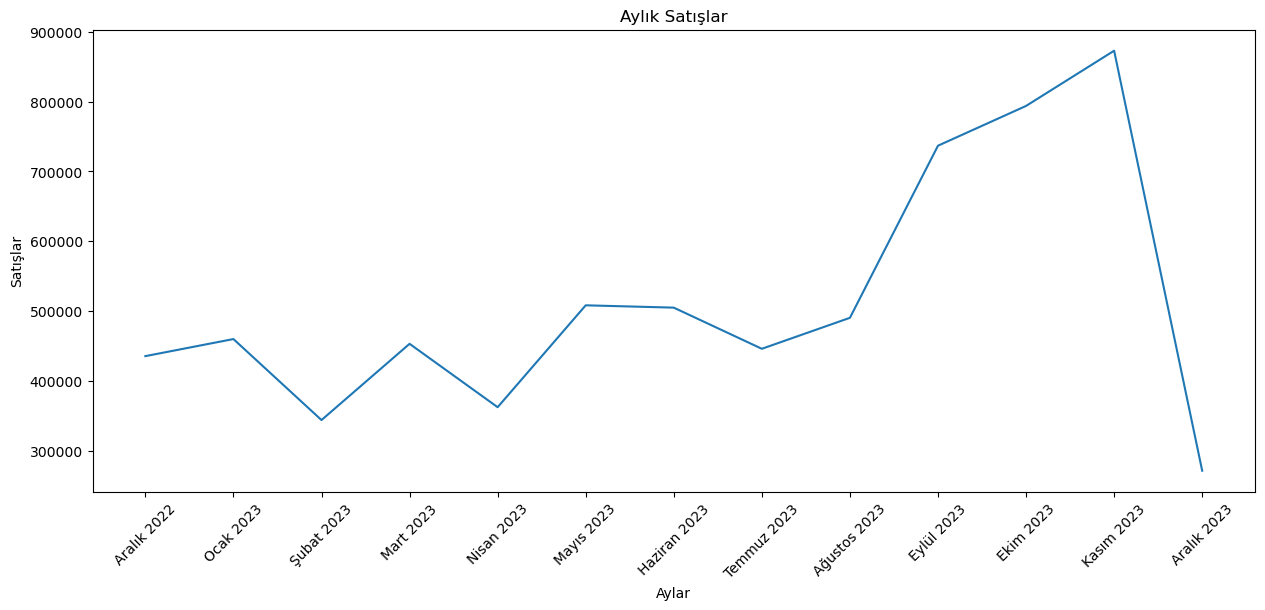

In [32]:
# Plotting the monthly sales
plt.figure(figsize=(15, 6))
sns.lineplot(x='month_label', y='TotalPrice', data=monthly_sales)
plt.xlabel('Aylar')
plt.ylabel('Satışlar')
plt.xticks(rotation=45)
plt.title('Aylık Satışlar')
plt.savefig(image_path + 'monthly_sales.png')
plt.show()

In [33]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['hour'] = df['InvoiceDate'].dt.hour  
hourly_sales = df.groupby('hour')['TotalPrice'].sum().reset_index()

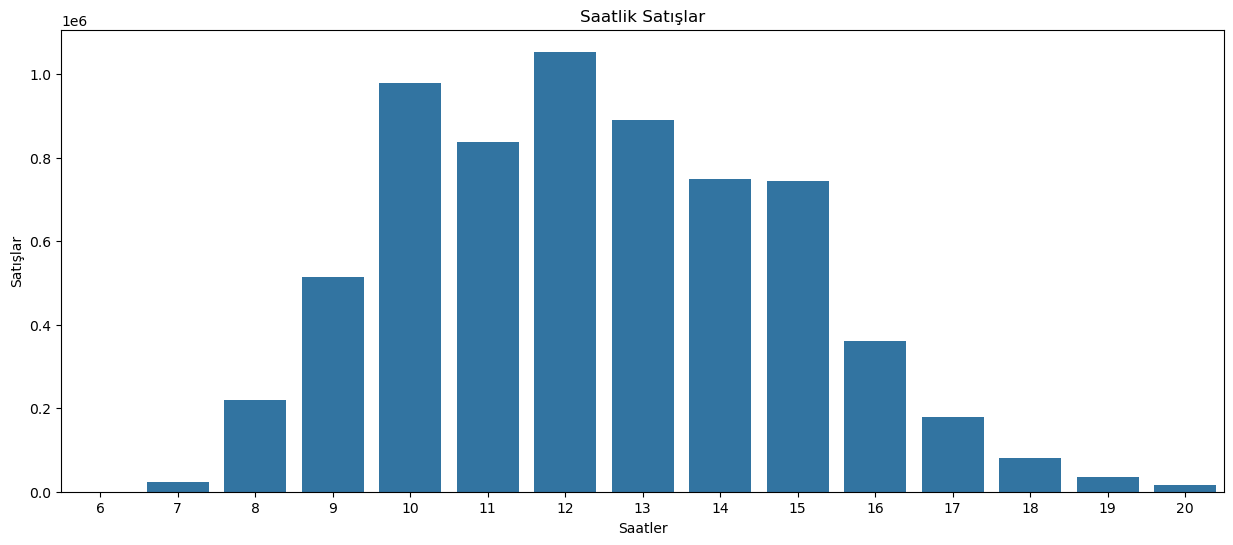

In [34]:
# Plotting the hourly sales
plt.figure(figsize=(15, 6))
sns.barplot(x='hour', y='TotalPrice', data=hourly_sales)
plt.xlabel('Saatler')
plt.ylabel('Satışlar')
plt.title('Saatlik Satışlar')
plt.savefig(image_path + 'hourly_sales.png')
plt.show()


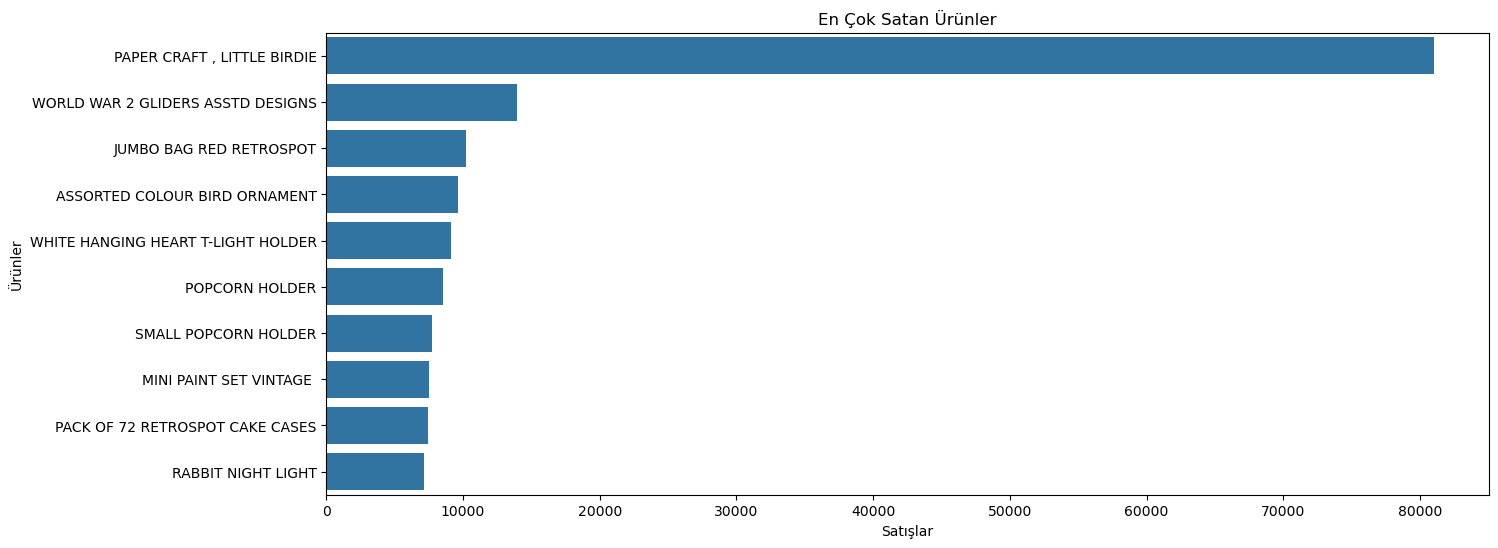

In [35]:
# most sold products
most_sold_products = db_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(15, 6))
sns.barplot(x='Quantity', y='Description', data=most_sold_products)
plt.xlabel('Satışlar')
plt.ylabel('Ürünler')
plt.title('En Çok Satan Ürünler')
plt.savefig(image_path + 'most_sold_products.png')
plt.show()


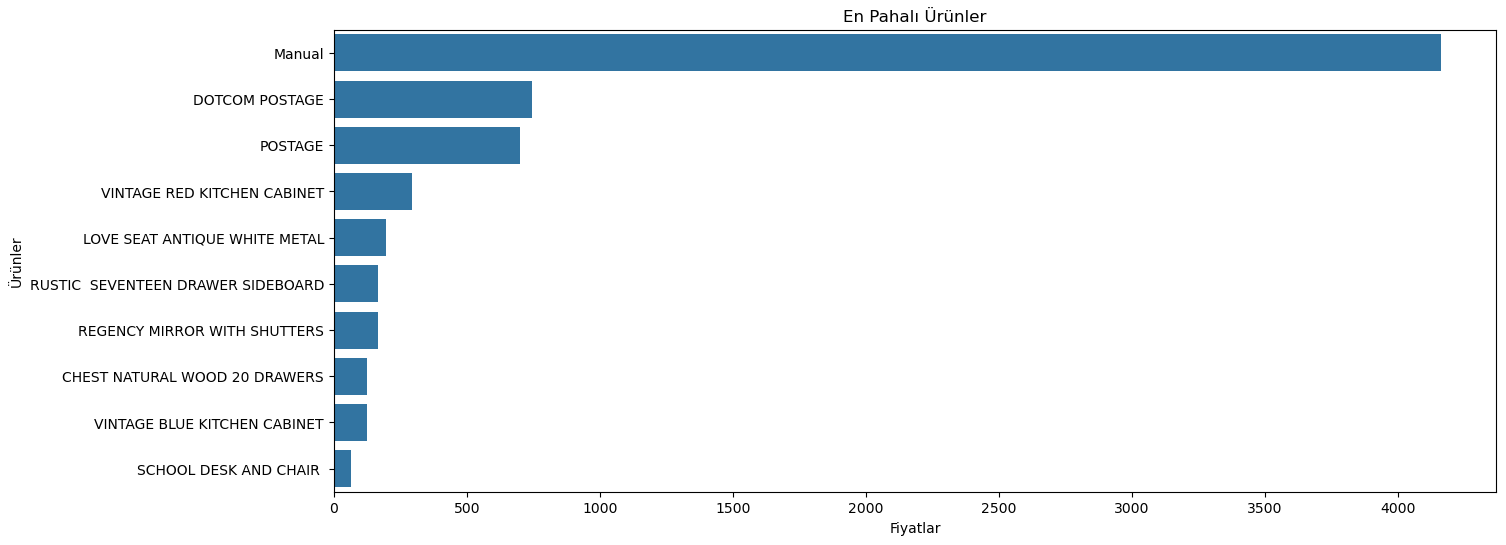

In [36]:
# most expensive products
most_expensive_products = db_df.groupby('Description')['UnitPrice'].max().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(15, 6))
sns.barplot(x='UnitPrice', y='Description', data=most_expensive_products)
plt.xlabel('Fiyatlar')
plt.ylabel('Ürünler')
plt.title('En Pahalı Ürünler')
plt.savefig(image_path + 'most_expensive_products.png')
plt.show()


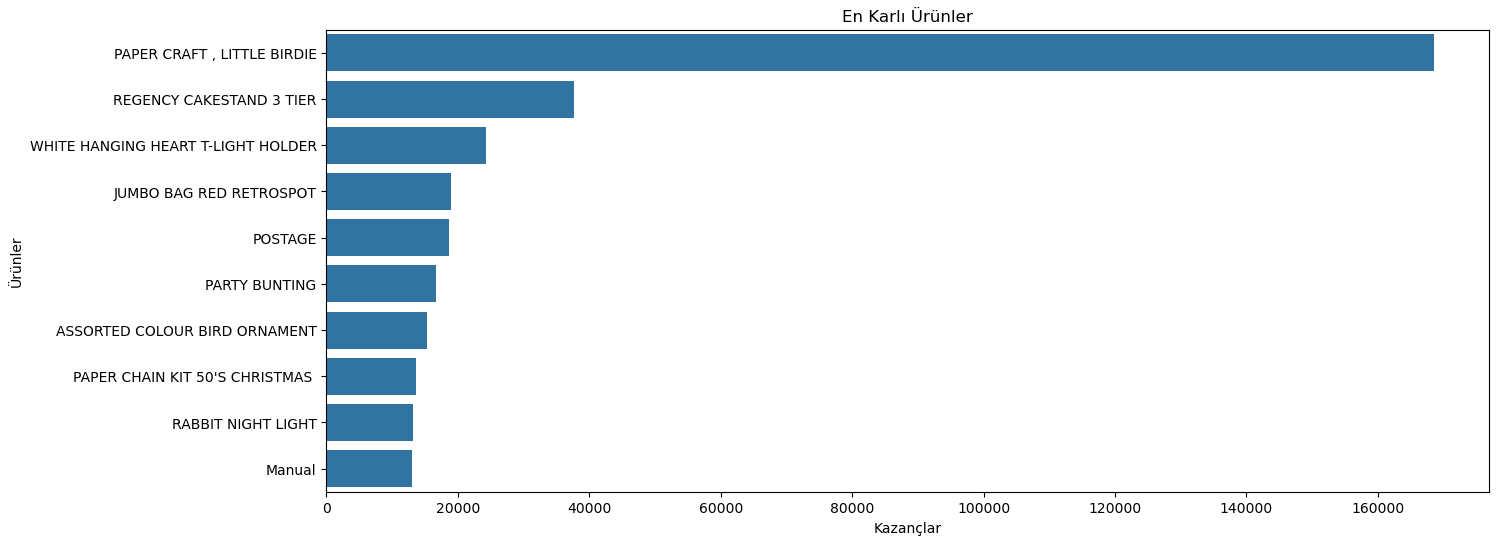

In [37]:
# en karlı ürünler
most_profitable_products = db_df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(15, 6))
sns.barplot(x='TotalPrice', y='Description', data=most_profitable_products)
plt.xlabel('Kazançlar')
plt.ylabel('Ürünler')
plt.title('En Karlı Ürünler')
plt.savefig(image_path + 'most_profitable_products.png')
plt.show()
